In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("✅ The series is likely stationary.")
    else:
        print("❌ The series is likely non-stationary.")

# AR(1) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

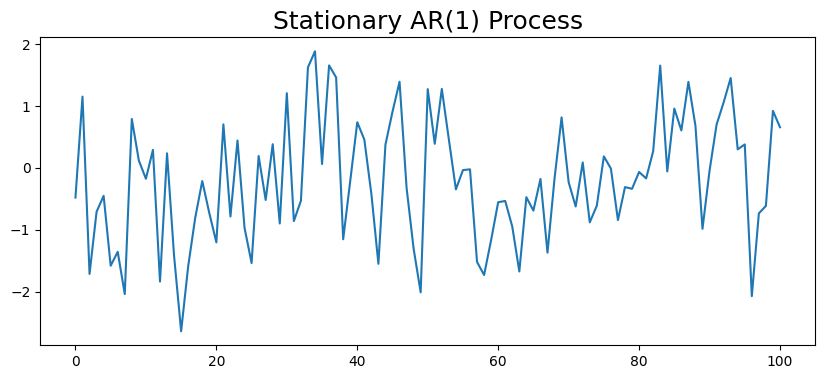

In [4]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [5]:
ar_1_process

array([-0.47930041,  1.15383492, -1.71516815, -0.70892647, -0.45101363,
       -1.58163162, -1.35770977, -2.04094151,  0.79220202,  0.12005603,
       -0.17498424,  0.29241347, -1.83857126,  0.23646548, -1.42560588,
       -2.64302288, -1.59295545, -0.80604407, -0.2122138 , -0.7311937 ,
       -1.20392099,  0.70506828, -0.78531981,  0.44401796, -0.96935889,
       -1.53900914,  0.19346091, -0.51792826,  0.38394027, -0.89852289,
        1.20943213, -0.85997064, -0.53137841,  1.62771585,  1.88781987,
        0.06372873,  1.65932842,  1.4643706 , -1.15422223, -0.21152811,
        0.73971925,  0.46012113, -0.41874711, -1.55154585,  0.37814729,
        0.90953087,  1.39471523, -0.32226486, -1.30765874, -2.01326076,
        1.275462  ,  0.39092516,  1.27802222,  0.46072415, -0.34681865,
       -0.03475317, -0.02252205, -1.52109346, -1.73234272, -1.16558645,
       -0.55481569, -0.53443372, -0.94866473, -1.67518917, -0.47317544,
       -0.69005364, -0.17811834, -1.37034216, -0.17017783,  0.81

In [6]:
perform_adf_test(ar_1_process)

ADF Statistic: -7.430284
p-value: 0.000000
✅ The series is likely stationary.


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

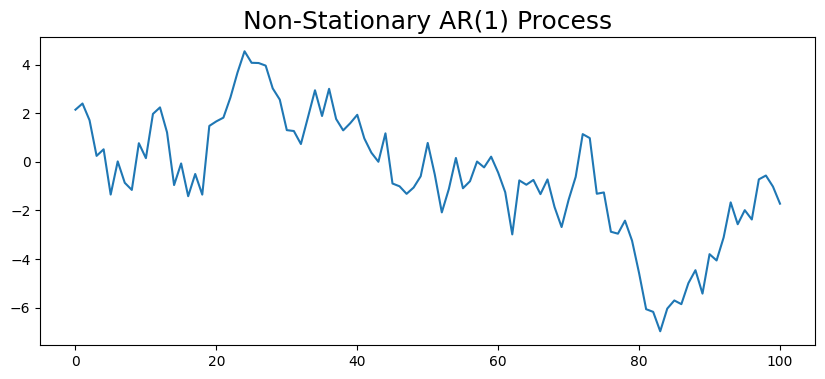

In [7]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [8]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -2.238532
p-value: 0.192559
❌ The series is likely non-stationary.


# AR(2) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

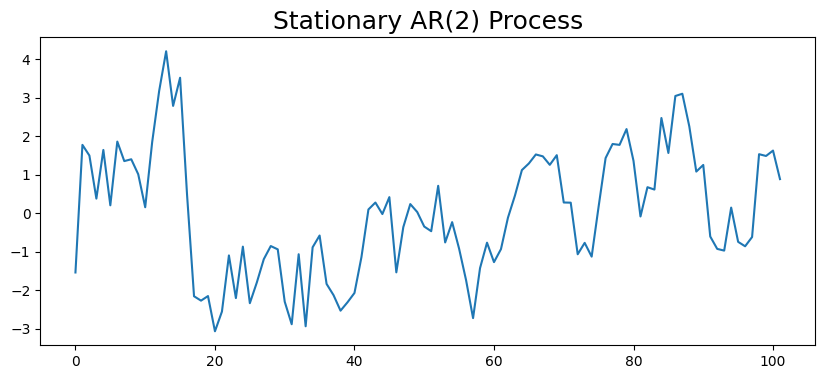

In [9]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [10]:
perform_adf_test(ar_2_process)

ADF Statistic: -3.546811
p-value: 0.006863
✅ The series is likely stationary.


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

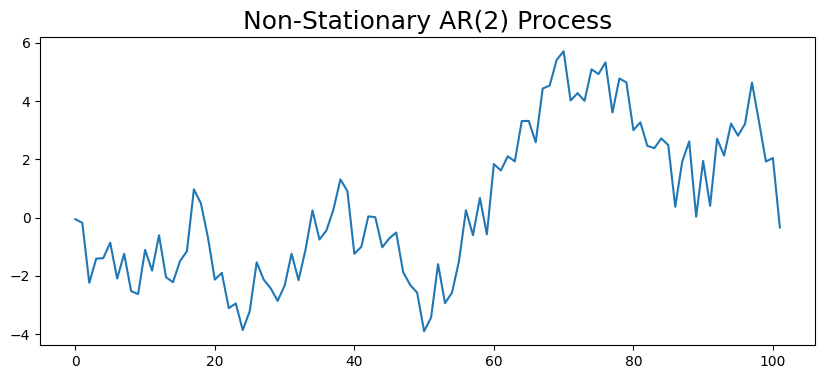

In [11]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [12]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -1.626985
p-value: 0.469069
❌ The series is likely non-stationary.


In [13]:
import yfinance as yf
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2025-9-1')

tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-25 00:00:00-04:00,338.899994,349.529999,335.029999,346.600006,86670000,0.0,0.0
2025-08-26 00:00:00-04:00,344.929993,351.899994,343.720001,351.670013,76651600,0.0,0.0
2025-08-27 00:00:00-04:00,351.940002,355.390015,349.160004,349.600006,65519000,0.0,0.0


In [14]:

tickerDf = tickerDf[['Close']]

#see your data
tickerDf.head()

,Close
Date,
2020-01-02 00:00:00-05:00,28.684000
2020-01-03 00:00:00-05:00,29.534000
2020-01-06 00:00:00-05:00,30.102667
2020-01-07 00:00:00-05:00,31.270666
2020-01-08 00:00:00-05:00,32.809334


In [15]:
import plotly.express as px

fig = px.line(tickerDf)
fig.show()

In [16]:
close_values = tickerDf['Close'].values
close_values
perform_adf_test(close_values)

ADF Statistic: -2.775388
p-value: 0.061876
❌ The series is likely non-stationary.


In [17]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

tickerDf.head()

/var/folders/lb/ycbntly138n0xkt0fdrnnk_w0000gn/T/ipykernel_92803/3577106435.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,FirstDifference
Date,,
2020-01-02 00:00:00-05:00,28.684000,0.850000
2020-01-03 00:00:00-05:00,29.534000,0.568666
2020-01-06 00:00:00-05:00,30.102667,1.167999
2020-01-07 00:00:00-05:00,31.270666,1.538668
2020-01-08 00:00:00-05:00,32.809334,-0.720001


In [18]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming tickerDf is your DataFrame with the provided data
# Create a subplot figure with 2 rows and 1 column, sharing the x-axis
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=("Close Price", "First Difference"))

# Add trace for Close price (first subplot)
fig.add_trace(
    go.Scatter(x=tickerDf.index, y=tickerDf['Close'], mode='lines', name='Close'),
    row=1, col=1
)

# Add trace for FirstDifference (second subplot)
fig.add_trace(
    go.Scatter(x=tickerDf.index, y=tickerDf['FirstDifference'], mode='lines', name='First Difference'),
    row=2, col=1
)

# Update layout for better appearance
fig.update_layout(
    height=600,
    width=1000,
    title_text="Close Price and First Difference Over Time",
    showlegend=True
)

# Update x-axis and y-axis titles
fig.update_xaxes(title_text="Date", row=2, col=1)  # Only set x-axis title for the bottom subplot
fig.update_yaxes(title_text="Close Price", row=1, col=1)
fig.update_yaxes(title_text="First Difference", row=2, col=1)

# Show the figure
fig.show()

In [19]:
close_values = tickerDf['FirstDifference'].values
close_values
perform_adf_test(close_values)

ADF Statistic: -6.723468
p-value: 0.000000
✅ The series is likely stationary.


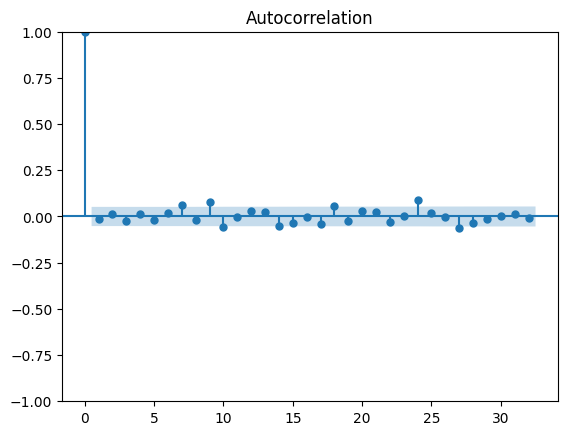

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(tickerDf.FirstDifference)

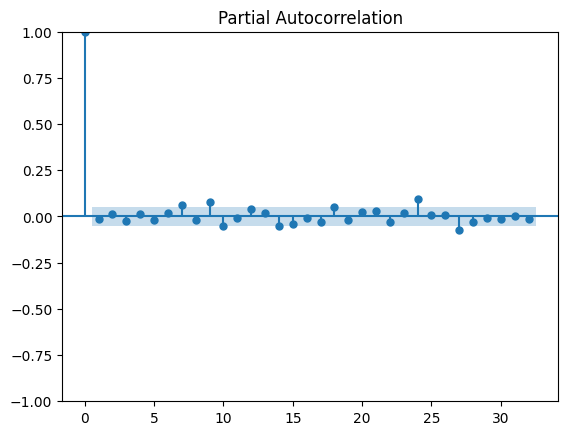

In [21]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)